# Анализ данных

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [147]:
data=pd.read_csv('train.csv')

In [148]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [150]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Проанализируем Healthcare_1

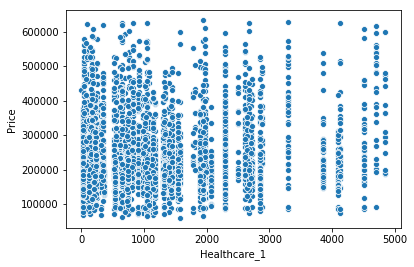

In [151]:
sns.scatterplot(data['Healthcare_1'], data['Price'])


In [152]:
data['Healthcare_1'].describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

Из графика видно что параметр Healthcare_1 не сильно влияет на цену и у нас половина значений поэтому можно удалить

In [153]:
data.drop('Healthcare_1',axis=1,inplace=True)

### Посмотрим следующий параметр Rooms

In [154]:
data['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

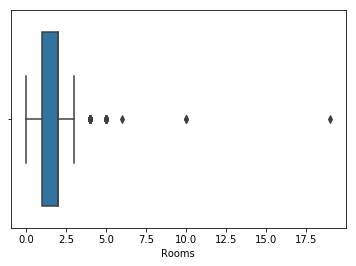

In [155]:
sns.boxplot(data['Rooms'])

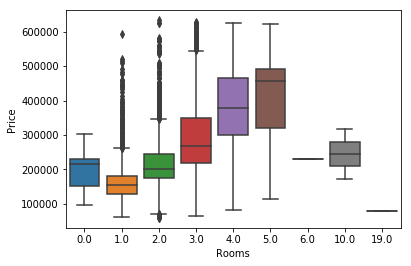

In [156]:
sns.boxplot(x=data['Rooms'],y=data['Price'])

In [157]:
data.loc[data['Rooms']>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [158]:
data.loc[data['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


Из данных видно, что для количества комнат больше пяти площадь не соответствует количествам комнат и цене.
Заменем на среднее количество 2 комнаты, а также количество комнат 0.

In [159]:
def prepare_rooms(df):
    df.loc[df['Rooms']>5,'Rooms']=2
    df.loc[df['Rooms']==0,'Rooms']=2
    return df  

In [160]:
data = prepare_rooms(data)

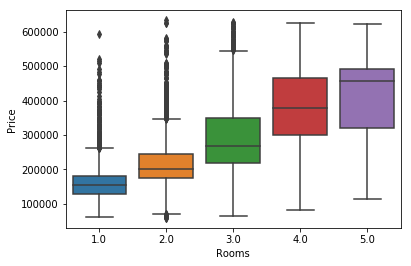

In [161]:
sns.boxplot(x=data['Rooms'],y=data['Price'])

Большинство наблюдений это 1,2,3 комнаты квартиры посмотрим описание

In [162]:
data.loc[data['Rooms']==1,'Price'].describe()

count      3705.000000
mean     159850.800729
std       51892.475206
min       60502.583500
25%      128711.103732
50%      154979.497993
75%      182212.201038
max      594565.299770
Name: Price, dtype: float64

In [163]:
data.loc[data['Rooms']==2,'Price'].describe()

count      3892.000000
mean     215209.552200
std       73455.004877
min       59174.778028
25%      174466.586899
50%      200355.120065
75%      243492.283228
max      633233.466570
Name: Price, dtype: float64

In [164]:
data.loc[data['Rooms']==3,'Price'].describe()

count      2235.000000
mean     289337.962452
std      104456.463546
min       64298.216337
25%      218501.022386
50%      268723.157677
75%      349766.968934
max      627525.072788
Name: Price, dtype: float64

### Проанализируем Square Rooms Price

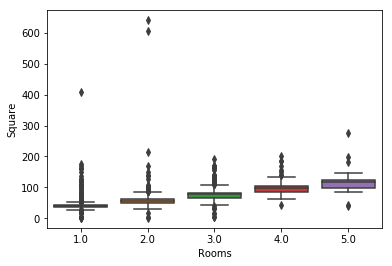

In [165]:
sns.boxplot(x=data['Rooms'],y=data['Square'])

In [166]:
data['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

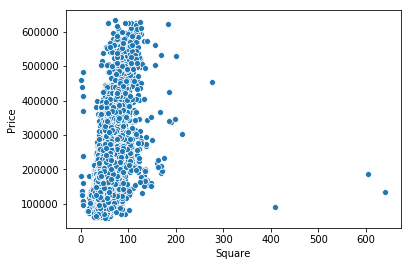

In [167]:
sns.scatterplot(data['Square'], data['Price'])

Видны явно выбросы. Почистим данные.

In [168]:
def prepare_square(df):
    df.loc[df['Square']>df['Rooms']*40+40,'Square']=df['Rooms']*40+40
    df.loc[df['Square']<df['Rooms']*15,'Square']=df['Rooms']*15
    return df       

In [169]:
data=prepare_square(data)

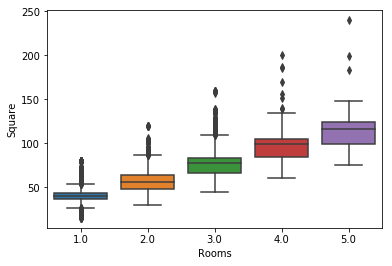

In [170]:
sns.boxplot(x=data['Rooms'],y=data['Square'])

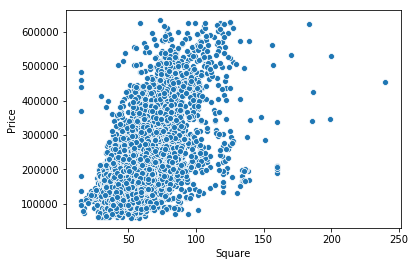

In [171]:
sns.scatterplot(data['Square'], data['Price'])

### Теперь этажность Floor

In [172]:
data['HouseFloor'].describe()        

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [173]:
data['Floor'].describe()

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

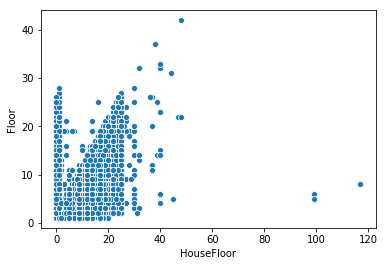

In [174]:
sns.scatterplot(data['HouseFloor'],data['Floor'])  

Видно что этаж не может быть больше чем этаже в доме 

In [175]:
def prepare_floor(df):
    df.loc[df['Floor']>df['HouseFloor'],'HouseFloor']=df['Floor']
    df.loc[df['HouseFloor']>df['Floor'].max(),'HouseFloor']=df['Floor'].max()
    return df    

In [176]:
data = prepare_floor(data)

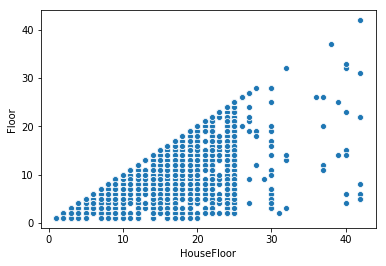

In [177]:
sns.scatterplot(data['HouseFloor'],data['Floor'])  

### Дальше HouseYear

In [178]:
data.loc[data['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [179]:
data.loc[data['HouseYear']==20052011,'HouseYear']=2008

In [180]:
data.loc[data['HouseYear']==4968,'HouseYear']=1968

In [181]:
data['HouseYear'].describe()

count    10000.00000
mean      1984.86600
std         18.41187
min       1910.00000
25%       1974.00000
50%       1977.00000
75%       2001.00000
max       2020.00000
Name: HouseYear, dtype: float64

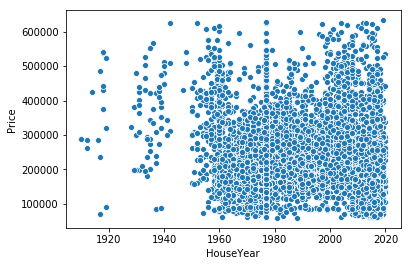

In [182]:
sns.scatterplot(data['HouseYear'],data['Price'])  

### Теперь LifeSquare

У нас есть LifeSquare заполненный 7887 элементов. Проанализируем данный параметр

In [183]:
data['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [184]:
def prepare_lifesquare(df):
    df.loc[df['Square']<df['LifeSquare'],'LifeSquare']=df['Square']
    return df

In [185]:
def fillna_life_square(df,source_df):
    df['LifeSquare']=df['LifeSquare'].fillna(source_df['LifeSquare'].mean())
    return df

In [186]:
data=fillna_life_square(data,data)
data=prepare_lifesquare(data)

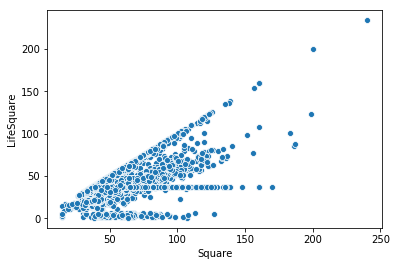

In [187]:
sns.scatterplot(data['Square'], data['LifeSquare'])

Теперь KitcherSquare

In [188]:
data['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

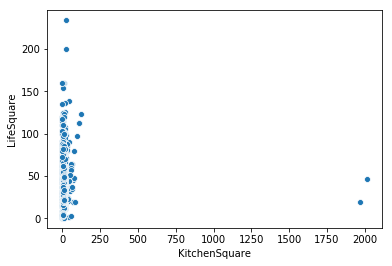

In [189]:
sns.scatterplot(data['KitchenSquare'], data['LifeSquare'])

In [190]:
data.loc[data['KitchenSquare']>200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,4.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,6.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275


In [191]:
def prepare_kitchensquare(df):
    df.loc[df['KitchenSquare']>df['LifeSquare']*0.8,'KitchenSquare']=df['LifeSquare']*0.6
    return df

In [192]:
data = prepare_kitchensquare(data)

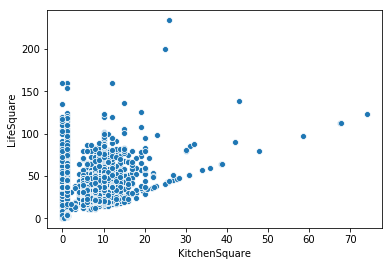

In [193]:
sns.scatterplot(data['KitchenSquare'], data['LifeSquare'])

dummy переменные

In [194]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [195]:
data['Ecology_2'].nunique()

2

In [196]:
data['Ecology_2'].unique()  

array(['B', 'A'], dtype=object)

In [197]:
data['Ecology_3'].unique() 

array(['B', 'A'], dtype=object)

In [198]:
pd.options.display.max_columns=40
data=pd.get_dummies(data)
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,0,1,0,1,0,1


# Обучение с учителем в Scikit-learn

In [199]:
target=data['Price']
features=data[data.columns.difference(['Price'])]

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

### Линейная регрессия

In [202]:
from sklearn.linear_model import LinearRegression as LR

In [203]:
modelLR=LR()

In [204]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [205]:
y_pred=modelLR.predict(X_test)

In [206]:
from sklearn.metrics import r2_score as r2,mean_squared_error as mse

In [207]:
r2(y_test,y_pred)

0.5177935369831185

In [208]:
mse(y_test,y_pred)

4147821854.5096726

In [209]:
res = pd.DataFrame({'model':['Linear regression'],
                   'r2_score':[r2(y_test,y_pred)],
                   'mean_squared_error':[mse(y_test,y_pred)]})

In [210]:
res

,model,r2_score,mean_squared_error
0,Linear regression,0.517794,4.147822e+09


Результат низкий

In [211]:
features.columns

Index(['DistrictId', 'Ecology_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Floor', 'Helthcare_2', 'HouseFloor', 'HouseYear', 'Id',
       'KitchenSquare', 'LifeSquare', 'Rooms', 'Shops_1', 'Shops_2_A',
       'Shops_2_B', 'Social_1', 'Social_2', 'Social_3', 'Square'],
      dtype='object')

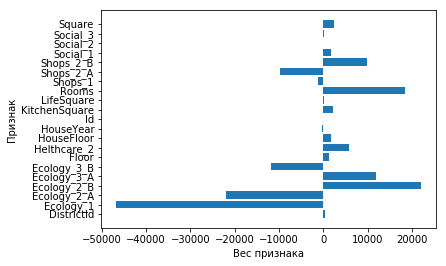

In [212]:
plt.barh(features.columns, modelLR.coef_.flatten())
plt.xlabel("Вес признака")
plt.ylabel("Признак")
plt.show()

### Стандартизируем

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

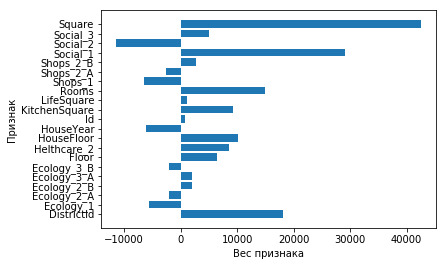

In [214]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features.columns)
modelLR.fit(X_train_scaled, y_train)
plt.barh(features.columns, modelLR.coef_.flatten())
plt.xlabel("Вес признака")
plt.ylabel("Признак")
plt.show()

In [215]:
important_features = [
    feature
    for feature, weight in zip(features.columns, modelLR.coef_.flatten())
    if np.abs(weight) > 0.5
]
important_features

['DistrictId',
 'Ecology_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Floor',
 'Helthcare_2',
 'HouseFloor',
 'HouseYear',
 'Id',
 'KitchenSquare',
 'LifeSquare',
 'Rooms',
 'Shops_1',
 'Shops_2_A',
 'Shops_2_B',
 'Social_1',
 'Social_2',
 'Social_3',
 'Square']

In [216]:
modelLR.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)
y_pred = modelLR.predict(X_test_scaled.loc[:, important_features])
r2(y_test,y_pred)

0.5179680367981145

### Анализ веса вносимого в результат почти не улучшил результат

### Модели линейной регрессии с регуляризацией

### LASSO

In [217]:
from sklearn.linear_model import Lasso, Ridge

In [218]:
modelLasso = Lasso(alpha=0.05)
modelLasso.fit(X_train, y_train)
y_pred = modelLasso.predict(X_test)
r2_score = r2(y_test,y_pred)
mse_score = mse(y_test,y_pred)

In [219]:
res.loc[len(res)]=['Lasso',r2_score,mse_score]

In [220]:
res

,model,r2_score,mean_squared_error
0,Linear regression,0.517794,4.147822e+09
1,Lasso,0.517794,4.147819e+09


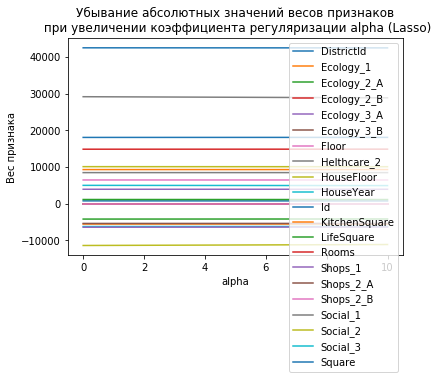

In [221]:
n = 50

coeffs = np.zeros((n, len(important_features)))
alpha_list = np.logspace(-3, 1, n)

for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val)
    lasso.fit(X_train_scaled.loc[:, important_features], y_train)
    
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(len(important_features)):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')

plt.xlabel('alpha')
plt.ylabel('Вес признака')

plt.legend(important_features)

### Убывание нет

### RIDGE

In [222]:
modelRidge = Ridge(alpha=10)
modelRidge.fit(X_train, y_train)
y_pred = modelRidge.predict(X_test)
r2_score = r2(y_test,y_pred)
mse_score = mse(y_test,y_pred)
res.loc[len(res)]=['Ridge',r2_score,mse_score]
res

,model,r2_score,mean_squared_error
0,Linear regression,0.517794,4.147822e+09
1,Lasso,0.517794,4.147819e+09
2,Ridge,0.518061,4.145520e+09


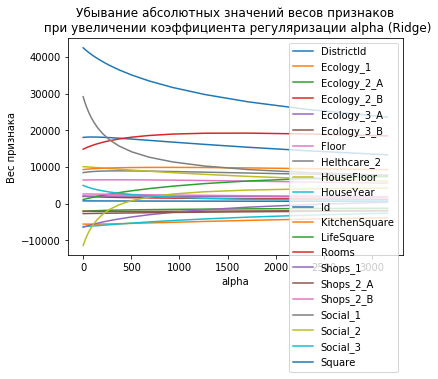

In [223]:
n = 50

coeffs = np.zeros((n, len(important_features)))
alpha_list = np.logspace(-3, 3.5, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val)
    ridge.fit(X_train_scaled.loc[:, important_features], y_train)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(len(important_features)):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')

plt.xlabel('alpha')
plt.ylabel('Вес признака')

plt.legend(important_features)

### Чем больще alphe тем веса убывают значение весов. Оставим alpha = 10

### Деревья

In [224]:
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid_scaler = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [225]:
max_depth_values = range(1,20)
score_data = pd.DataFrame()

In [226]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.tree import DecisionTreeRegressor as DTR
for i in max_depth_values:
    clf = DTR(criterion='mse',max_depth=i)
    clf.fit(X_train_scaler,y_train)
    train_score = clf.score(X_train_scaler,y_train)
    test_score = clf.score(X_valid_scaler,y_test)
    temp_score_data = pd.DataFrame({'max_depth':[i],
                                   'train_score':[train_score],
                                   'test_score':[test_score]})
    score_data = score_data.append(temp_score_data)

score_data_long = pd.melt(score_data,id_vars=['max_depth'],
                          value_vars=['train_score','test_score'],
                         var_name='set_type', value_name='score')


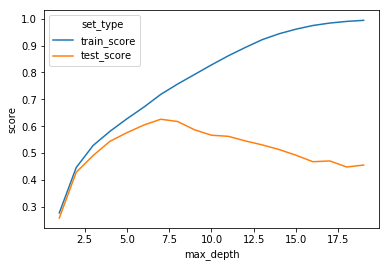

In [227]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=score_data_long)

In [228]:
modelDTR = DTR(criterion='mse',max_depth=7)
modelDTR.fit(X_train,y_train)
y_pred = modelDTR.predict(X_test)
r2_score = r2(y_test,y_pred)
mse_score = mse(y_test,y_pred)

In [229]:
r2_score

0.627076215485588

In [230]:
mse_score

3207799028.2373743

In [231]:
res.loc[len(res)]=['RandomForestRegressor',r2_score,mse_score]

In [232]:
max_depth_values = range(1,20)
score_data = pd.DataFrame()
for i in max_depth_values:
    clf = RF(n_estimators=40,max_depth=i,random_state=31)
    clf.fit(X_train_scaler,y_train)
    train_score = clf.score(X_train_scaler,y_train)
    test_score = clf.score(X_valid_scaler,y_test)
    temp_score_data = pd.DataFrame({'max_depth':[i],
                                   'train_score':[train_score],
                                   'test_score':[test_score]})
    score_data = score_data.append(temp_score_data)
    score_data_long = pd.melt(score_data,id_vars=['max_depth'],
                          value_vars=['train_score','test_score'],
                         var_name='set_type', value_name='score')

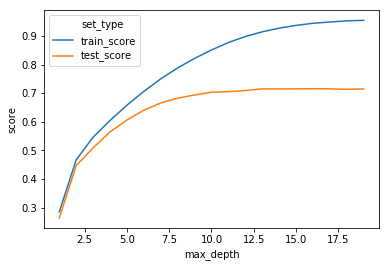

In [233]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=score_data_long)

In [234]:
modelRF=RF(n_estimators=40,max_depth=15,random_state=42)
modelRF.fit(X_train_scaler, y_train)
y_pred = modelRF.predict(X_valid_scaler)
r2_score = r2(y_test,y_pred)
mse_score = mse(y_test,y_pred)

In [235]:
r2_score

0.704470994139849

In [236]:
mse_score

2542068103.938576

In [237]:
res.loc[len(res)]=['DecisionTreeRegressor',r2_score,mse_score]

In [238]:
res

,model,r2_score,mean_squared_error
0,Linear regression,0.517794,4.147822e+09
1,Lasso,0.517794,4.147819e+09
2,Ridge,0.518061,4.145520e+09
3,RandomForestRegressor,0.627076,3.207799e+09
4,DecisionTreeRegressor,0.704471,2.542068e+09


GridSearch не использовал комп зависал(((

# Обучение без учителя

Исходя из линейной регрессии очень сильно на цену влияет Square, District, Social, HouseFloor, Rooms. 
По работаем с этими данными

In [99]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 21 columns):
DistrictId       7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2_A      7000 non-null uint8
Ecology_2_B      7000 non-null uint8
Ecology_3_A      7000 non-null uint8
Ecology_3_B      7000 non-null uint8
Floor            7000 non-null int64
Helthcare_2      7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Id               7000 non-null int64
KitchenSquare    7000 non-null float64
LifeSquare       7000 non-null float64
Rooms            7000 non-null float64
Shops_1          7000 non-null int64
Shops_2_A        7000 non-null uint8
Shops_2_B        7000 non-null uint8
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Square           7000 non-null float64
dtypes: float64(6), int64(9), uint8(6)
memory usage: 916.0 KB


In [101]:
X_train_cluster = X_train

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [103]:
train_scaled_year=scaler.fit_transform(X_train_cluster.loc[:,['HouseYear','Square']])
train_scaled_rooms=scaler.fit_transform(X_train_cluster.loc[:,['Rooms','Square']])
train_scaled_social=scaler.fit_transform(X_train_cluster.loc[:,['Social_1','Square']])
train_scaled_floor=scaler.fit_transform(X_train_cluster.loc[:,['HouseFloor','Square']])

Year

In [104]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=100)
    temp_model.fit(train_scaled_year)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

110.14736104223664
83.10225532103209
64.56944668083574
51.1615914090616
43.712543193545535
36.775263832881464
31.63331533653161
28.069523229558484


Text(0.5, 1.0, 'INERTIA')

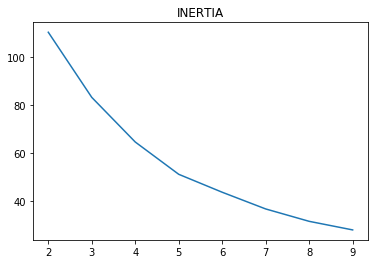

In [105]:
plt.plot([i for i in range(2,10) ],inertia_arr)
plt.title('INERTIA')

Для года 4

In [106]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=100)
    temp_model.fit(train_scaled_rooms)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

126.71299716275324
36.8501936125238
26.572346513883435
20.742582804882048
15.75799992398845
12.513552124022285
10.367254363092652
8.687071443002


Text(0.5, 1.0, 'INERTIA')

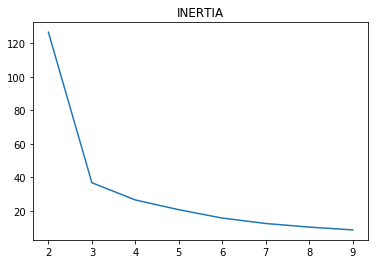

In [107]:
plt.plot([i for i in range(2,10) ],inertia_arr)
plt.title('INERTIA')

Для rooms 3


In [108]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=100)
    temp_model.fit(train_scaled_social)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

205.3619981803066
118.84392148851728
96.71748128945868
79.24536405783084
64.54151171439418
51.86363659453701
44.90813018604686
40.25071551601873


Text(0.5, 1.0, 'INERTIA')

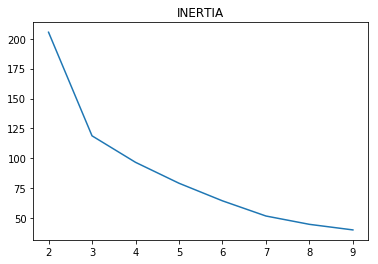

In [109]:
plt.plot([i for i in range(2,10) ],inertia_arr)
plt.title('INERTIA')

Для social 3

113.85136318863998
86.78619091491561
66.12471762536126
52.186709324796794
43.95184435929961
37.85490515991894
32.81504529831366
28.712571076570274


Text(0.5, 1.0, 'INERTIA')

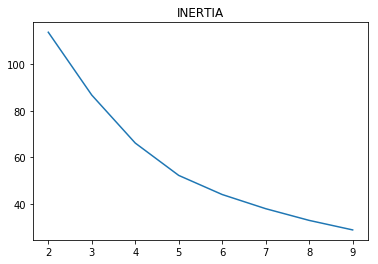

In [110]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=100)
    temp_model.fit(train_scaled_floor)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)
plt.plot([i for i in range(2,10) ],inertia_arr)
plt.title('INERTIA')

Для floor 4

In [111]:
from sklearn.cluster import AgglomerativeClustering
model_year=AgglomerativeClustering(n_clusters=4)
X_train_cluster['cluster_year']=model_year.fit_predict(train_scaled_year)

model_rooms=AgglomerativeClustering(n_clusters=3)
X_train_cluster['cluster_rooms']=model_rooms.fit_predict(train_scaled_rooms)

model_social=AgglomerativeClustering(n_clusters=3)
X_train_cluster['cluster_social']=model_social.fit_predict(train_scaled_social)

model_floor=AgglomerativeClustering(n_clusters=4)
X_train_cluster['cluster_floor']=model_floor.fit_predict(train_scaled_floor)

### X_test

In [112]:
X_test_cluster = X_test

In [113]:
test_scaled_year=scaler.fit_transform(X_test_cluster.loc[:,['HouseYear','Square']])
test_scaled_rooms=scaler.fit_transform(X_test_cluster.loc[:,['Rooms','Square']])
test_scaled_social=scaler.fit_transform(X_test_cluster.loc[:,['Social_1','Square']])
test_scaled_floor=scaler.fit_transform(X_test_cluster.loc[:,['HouseFloor','Square']])

model_year=AgglomerativeClustering(n_clusters=4)
X_test_cluster['cluster_year']=model_year.fit_predict(test_scaled_year)

model_rooms=AgglomerativeClustering(n_clusters=3)
X_test_cluster['cluster_rooms']=model_rooms.fit_predict(test_scaled_rooms)

model_social=AgglomerativeClustering(n_clusters=3)
X_test_cluster['cluster_social']=model_social.fit_predict(test_scaled_social)

model_floor=AgglomerativeClustering(n_clusters=4)
X_test_cluster['cluster_floor']=model_floor.fit_predict(test_scaled_floor)

### District

In [114]:
distr_info1=X_train_cluster['DistrictId'].value_counts().reset_index().\
    rename(columns={"index":"DistrictId","DistrictId":'large_district'})

In [115]:
distr_info1['is_large']=(distr_info1['large_district']>100).astype(int)

In [116]:
def add_distr_info(df,distr_info1):
    df=pd.merge(df,distr_info1,on='DistrictId',how='left')
    df['is_large']=df['is_large'].fillna(0)
    df['large_district']=df['large_district'].fillna(1)
    return df

In [117]:
X_train_cluster = add_distr_info(X_train_cluster,distr_info1)

In [118]:
def dummies(df):
    cluster_year='cluster_year'
    cluster_rooms='cluster_rooms'
    cluster_social='cluster_social'
    cluster_floor='cluster_floor'
    df[cluster_year]=df[cluster_year].astype(object)
    df[cluster_rooms]=df[cluster_rooms].astype(object)
    df[cluster_social]=df[cluster_social].astype(object)
    df[cluster_floor]=df[cluster_floor].astype(object)
    df=pd.get_dummies(df)
    return df

In [119]:
X_train_cluster=dummies(X_train_cluster)

In [120]:
X_train_cluster.columns

Index(['DistrictId', 'Ecology_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Floor', 'Helthcare_2', 'HouseFloor', 'HouseYear', 'Id',
       'KitchenSquare', 'LifeSquare', 'Rooms', 'Shops_1', 'Shops_2_A',
       'Shops_2_B', 'Social_1', 'Social_2', 'Social_3', 'Square',
       'large_district', 'is_large', 'cluster_year_0', 'cluster_year_1',
       'cluster_year_2', 'cluster_year_3', 'cluster_rooms_0',
       'cluster_rooms_1', 'cluster_rooms_2', 'cluster_social_0',
       'cluster_social_1', 'cluster_social_2', 'cluster_floor_0',
       'cluster_floor_1', 'cluster_floor_2', 'cluster_floor_3'],
      dtype='object')

In [121]:
feats=[ 'Social_1', 'Social_2', 'Social_3', 'Square',
       'cluster_year_0', 'cluster_year_1', 'cluster_year_2', 'cluster_year_3',
       'cluster_rooms_0', 'cluster_rooms_1', 'cluster_rooms_2', 'cluster_social_0', 'cluster_social_1',
       'cluster_social_2', 'cluster_floor_0', 'cluster_floor_1',
       'cluster_floor_2', 'cluster_floor_3', 'large_district', 'is_large']

In [122]:
model=RF(max_depth=7,random_state=42)

In [124]:
model.fit(X_train_cluster.loc[:,feats],y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

TEST 

In [125]:
X_test_cluster=add_distr_info(X_test_cluster,distr_info1)

In [126]:
X_test_cluster=dummies(X_test_cluster)

In [127]:
X_test_cluster.columns

Index(['DistrictId', 'Ecology_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Floor', 'Helthcare_2', 'HouseFloor', 'HouseYear', 'Id',
       'KitchenSquare', 'LifeSquare', 'Rooms', 'Shops_1', 'Shops_2_A',
       'Shops_2_B', 'Social_1', 'Social_2', 'Social_3', 'Square',
       'large_district', 'is_large', 'cluster_year_0', 'cluster_year_1',
       'cluster_year_2', 'cluster_year_3', 'cluster_rooms_0',
       'cluster_rooms_1', 'cluster_rooms_2', 'cluster_social_0',
       'cluster_social_1', 'cluster_social_2', 'cluster_floor_0',
       'cluster_floor_1', 'cluster_floor_2', 'cluster_floor_3'],
      dtype='object')

In [128]:
y_pred = model.predict(X_test_cluster.loc[:,feats])
r2_score = r2(y_test,y_pred)
mse_score = mse(y_test,y_pred)

In [129]:
r2_score

0.651346382122711

In [130]:
mse_score 

2999033001.0045

In [131]:
res.loc[len(res)]=['RandomForestRegressorWitnCluster',r2_score,mse_score]

In [132]:
res

,model,r2_score,mean_squared_error
0,Linear regression,0.517794,4.147822e+09
1,Lasso,0.517794,4.147819e+09
2,Ridge,0.518061,4.145520e+09
3,RandomForestRegressor,0.625469,3.221627e+09
4,DecisionTreeRegressor,0.704471,2.542068e+09
5,RandomForestRegressorWitnCluster,0.651346,2.999033e+09


### Самый высокий у дерева DecisionTreeRegressor

# Тестовая выборка

In [239]:
test=pd.read_csv('test.csv')
test1=test

In [240]:
test1['Rooms'].describe()

count    5000.000000
mean        1.910000
std         0.838594
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        17.000000
Name: Rooms, dtype: float64

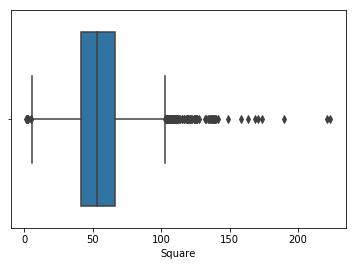

In [241]:
sns.boxplot(test1['Square'])

In [242]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


### Подготовим данные

In [243]:
test.drop('Healthcare_1',axis=1,inplace=True)
test=prepare_rooms(test)
test=prepare_square(test)
test = prepare_floor(test)
test=fillna_life_square(test,test)
test=prepare_lifesquare(test)
test = prepare_kitchensquare(test)
test=pd.get_dummies(test)

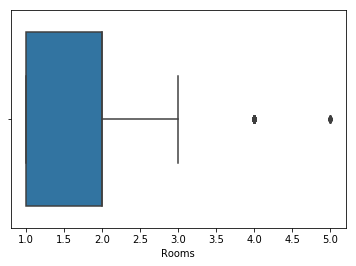

In [244]:
sns.boxplot(test['Rooms'])

In [136]:
test['Rooms'].describe()

count    5000.000000
mean        1.999600
std         0.028284
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Rooms, dtype: float64

In [245]:
test=pd.get_dummies(test)

In [246]:
test['Price']=modelDTR.predict(test)

In [247]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
Price            5000 non-null float64
dtypes: float64(7), int64(9), uint8(6)
memory usage: 654.4 KB


In [248]:
test.loc[:,['Id','Price']].to_csv('SKashenkov_predictions.csv',index=None)